## Урок 2. Масштабирование признаков. Регуляризация. Стохастический градиентный спуск.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# К признаку стажа добавим новые признаки
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],  # стаж
              [500, 700, 750, 600, 1450,        # средняя стоимость занятия
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]])  # квалификация репетитора
               
y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]

In [14]:
w = np.linalg.inv(X_st @ X_st.T) @ X_st @ y
w[1:] # 21.86576833,  4.56617094,  5.2704732

array([6.12241513e+00, 2.94591674e-03, 5.27047320e+00])

### Нормализация [0, 1]

In [4]:
X[1].min(), X[1].max()

(0, 10)

In [5]:
X[2].min(), X[2].max()

(450, 2000)

In [6]:
X_norm = X.copy()
X_norm = X_norm.astype(np.float64)
X_norm

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 3.00e+00, 0.00e+00,
        5.00e+00, 1.00e+01, 1.00e+00, 2.00e+00],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

$$x_{ij} = \frac{x_{ij} - min_{j} (x_{ij})}{max_{j} (x_{ij})-min_{j} (x_{ij})}$$

In [7]:
X_norm[1] = (X[1] - X[1].min()) / (X[1].max() - X[1].min())
X_norm[1]

array([0.1, 0.1, 0.2, 0.1, 0.3, 0. , 0.5, 1. , 0.1, 0.2])

In [8]:
X_norm[2] = (X[2] - X[2].min()) / (X[2].max() - X[2].min())
X_norm[2]

array([0.03225806, 0.16129032, 0.19354839, 0.09677419, 0.64516129,
       0.22580645, 0.67741935, 1.        , 0.        , 0.35483871])

### Стандартизация

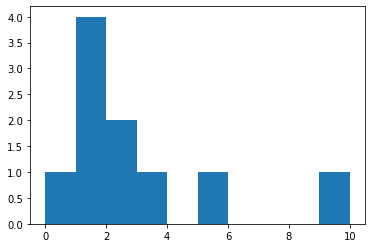

In [9]:
plt.hist(X[1]);

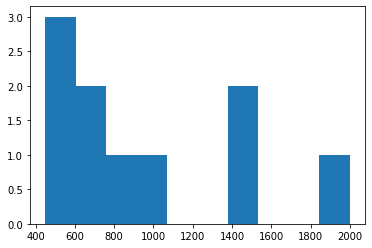

In [10]:
plt.hist(X[2]);

$$x_{ij}=\frac{x_{ij} - \mu_{j}}{\sigma_{j}}$$

In [11]:
X_st = X.copy().astype(np.float64)

X_st[1] = (X[1] - X[1].mean()) / X[1].std()
X_st[1]

array([-0.57142857, -0.57142857, -0.21428571, -0.57142857,  0.14285714,
       -0.92857143,  0.85714286,  2.64285714, -0.57142857, -0.21428571])

In [12]:
X_st[1].mean(), X_st[1].std()

(3.3306690738754695e-17, 1.0)

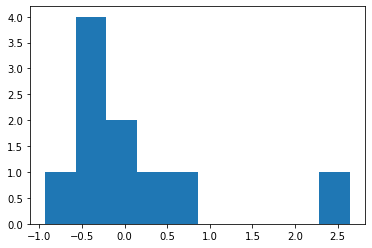

In [13]:
plt.hist(X_st[1]);

In [15]:
def calc_std_feat(x):
    res = (x - x.mean()) / x.std()
    return res

In [16]:
X_st[2] = calc_std_feat(X[2])
X_st[3] = calc_std_feat(X[3])
print(X_st[2])
print(X_st[3])

[-0.97958969 -0.56713087 -0.46401617 -0.77336028  0.97958969 -0.36090146
  1.08270439  2.11385144 -1.08270439  0.05155735]
[-0.89625816 -0.89625816  0.38411064 -0.89625816  0.38411064 -0.89625816
  1.66447944  1.66447944 -0.89625816  0.38411064]


### Стохастический градиентный спуск (SGD)

In [17]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

def eval_model(X, y, iterations, alpha=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations + 1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T))
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [18]:
eval_model(X_st, y, iterations=1000, alpha=1e-3)

100 [10.82085913  1.29195795  1.98348488  2.85162983] 2248.0687649833903
200 [19.27186149  2.14047528  2.7330693   3.60356199] 1510.2342373891092
300 [26.18957149  2.65450377  3.14650922  4.02491826] 1022.3117228222376
400 [31.85217926  2.97593535  3.36731266  4.25691776] 697.495399673218
500 [36.48740201  3.18621662  3.47783381  4.380594  ] 480.53723685247013
600 [40.28164149  3.33210452  3.52533114  4.4424407 ] 335.3786903208635
700 [43.38747997  3.44044741  3.53692186  4.46912965] 238.17499151935812
800 [45.92981625  3.52666784  3.52816434  4.4759573 ] 173.0530720840704
900 [48.01088834  3.59963079  3.50798339  4.47169216] 129.41143950399112
1000 [49.71438487  3.66443755  3.48149699  4.4613567 ] 100.15781666892349


array([49.71438487,  3.66443755,  3.48149699,  4.4613567 ])

In [19]:
def eval_sgd_model(X, y, iterations, qty_in_batch, alpha=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1] # число наблюдений
    n_batch = n // qty_in_batch
    if n % qty_in_batch != 0:
        n_batch += 1
    # print(n_batch)
    for i in range(1, iterations + 1):
        for b in range(n_batch):
            start_ = qty_in_batch * b
            end_ = qty_in_batch * (b + 1)
            X_tmp = X[:, start_ : end_]
            y_tmp = y[start_ : end_]
            y_pred_tmp = np.dot(W, X_tmp)
            err = calc_mse(y_tmp, y_pred_tmp)
            W -= alpha * (1/n * 2 * np.dot((y_pred_tmp - y_tmp), X_tmp.T))
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [20]:
eval_sgd_model(X_st, y, iterations=1000, qty_in_batch=7, alpha=1e-3) # 100.15781666892349

100 [10.81768199  1.29211596  1.98434116  2.85187692] 2522.789859187071
200 [19.2667204   2.14090213  2.73471582  3.60404193] 1638.0512843953377
300 [26.18331231  2.65508951  3.14871155  4.02547865] 1079.829587461432
400 [31.84538726  2.97653289  3.36983412  4.25741062] 719.5624052459511
500 [36.48047631  3.18670618  3.48048876  4.38091792] 483.4825859720406
600 [40.27484773  3.33240763  3.52799167  4.44254283] 327.1549212062718
700 [43.38098818  3.44052217  3.5395083   4.46899484] 222.86385094602656
800 [45.92372825  3.52649917  3.53063226  4.47559543] 152.89863380046597
900 [48.00525771  3.59922111  3.51031216  4.47112755] 105.75171355762372
1000 [49.70923163  3.66379947  3.48368088  4.46062051] 73.8595179617141


array([49.70923163,  3.66379947,  3.48368088,  4.46062051])

### L1 регуляризация - Lasso

$$\sum^{n}_{i=1}L_i(\vec{x}_i,{y_i},\vec{w}) + \lambda \sum^{m}_{j=1}|w_{j}| \rightarrow \underset{w}{\text{min}}$$

### L2 регуляризация - Ridge

$$\sum^{n}_{i=1}L_i(\vec{x}_i,y_i,\vec{w}) + \lambda \sum^{m}_{j=1}w_{j}^{2} \rightarrow \underset{w}{\text{min}}$$

In [21]:
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations + 1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + 2 * lambda_ * W) 
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [22]:
eval_model_reg2(X_st, y, iterations=1000, alpha=1e-3, lambda_=0.001)

100 [10.81977943  1.29188479  1.98326638  2.85123887] 2248.174495966113
200 [19.26820475  2.14025079  2.73257885  3.60272972] 1510.52005056178
300 [26.18241951  2.65414327  3.14578694  4.02368617] 1022.7641434294361
400 [31.84103209  2.97547956  3.36642337  4.25535143] 698.0693104166692
500 [36.47205635  3.18570474  3.47683987  4.37875637] 481.18204747799444
600 [40.26209948  3.33156577  3.52428387  4.44038363] 336.04984524294935
700 [43.36388132  3.43990014  3.53586071  4.46689313] 238.83798105676905
800 [45.90238819  3.52612135  3.5271187   4.47357128] 173.68373121426245
900 [47.97990927  3.59908764  3.50697503  4.46917888] 129.99460131981883
1000 [49.68015829  3.66389563  3.48054215  4.45873282] 100.68542522258228


array([49.68015829,  3.66389563,  3.48054215,  4.45873282])

In [23]:
# В некоторых алгоритмах используется обратный коэффициент
lambda_=1e-5
C = 1/lambda_

### Домашние задания

1. Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока).  

2. Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?  

3. *Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации.

In [118]:
#1. Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока).
def eval_model_reg2_change_lambda(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    w_list = []
    lambda_list = []
    for l in range(100):
        lambda_ += 1e-8
        for i in range(1, iterations + 1):
            y_pred = np.dot(W, X)
            err = calc_mse(y, y_pred)
            W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + 2 * lambda_ * W) 
            #if i % (iterations / 10) == 0:
                #print(i, W, err, lambda_)
        w_list.append(W.copy())
        lambda_list.append(lambda_)   
    w_list = np.array(w_list)
    return lambda_list, w_list

In [134]:
lambda_list, w_list = eval_model_reg2_change_lambda(X_st, y, iterations=1000, alpha=1e-3)

(2e-08, 1.0100000000000003e-06)

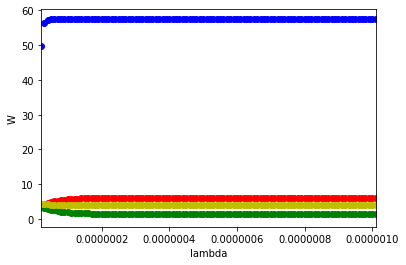

In [135]:
plt.scatter(lambda_list, w_list[:,0], c = 'b')
plt.scatter(lambda_list, w_list[:,1], c = 'r')
plt.scatter(lambda_list, w_list[:,2], c = 'g')
plt.scatter(lambda_list, w_list[:,3], c = 'y')
plt.xlabel('lambda')
plt.ylabel('W')
plt.xlim([min(lambda_list), max(lambda_list)])

Интересно, что веса меняются только на первых итерациях изменения lambda

In [136]:
# 2.Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

In [137]:
X_st[1] = calc_std_feat(X_norm[1])

In [140]:
X_norm[1]

array([0.1, 0.1, 0.2, 0.1, 0.3, 0. , 0.5, 1. , 0.1, 0.2])

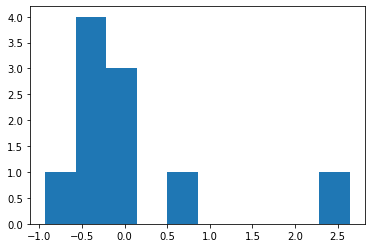

In [139]:
plt.hist(X_st[1]);

In [144]:
#вывод - разницы нет при стандартизации нормализованных и не нормализованных данных

In [146]:
# 3. *Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации.
#производная от отрицательного число дает -1, от положительного 1, от нуля - 0

In [147]:
def eval_model_reg1(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations + 1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * np.sign(W)) 
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [148]:
eval_model_reg1(X_st, y, iterations=1000, alpha=1e-3)

100 [10.82085913  1.29195794  1.98348488  2.85162983] 2248.0687650896843
200 [19.27186149  2.14047528  2.7330693   3.60356199] 1510.2342375355206
300 [26.18957149  2.65450377  3.14650922  4.02491826] 1022.311722977699
400 [31.85217926  2.97593535  3.36731265  4.25691776] 697.4953998232718
500 [36.48740201  3.18621662  3.47783381  4.380594  ] 480.5372369904079
600 [40.28164148  3.33210452  3.52533114  4.4424407 ] 335.37869044394586
700 [43.38747997  3.44044741  3.53692186  4.46912964] 238.17499162700133
800 [45.92981625  3.52666784  3.52816433  4.4759573 ] 173.05307217686192
900 [48.01088834  3.59963079  3.50798339  4.47169216] 129.41143958312
1000 [49.71438487  3.66443755  3.48149699  4.46135669] 100.1578167358463


array([49.71438487,  3.66443755,  3.48149699,  4.46135669])